This project is aimed to predict handwriting which dataset is provided by kaggle
Here the following path of our project:
1. Read data by converting original dataset into numpy using idx2numpy
2. data exploration
3. data split
4. implement model
5. fit model and evaluate model
6. hyperparameter tuning 
7. visualize data

this stage cover 2 first-step mentioned above

In [53]:
#!pip install idx2numpy

import idx2numpy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.model_selection import train_test_split, StratifiedKFold

# Specify the file paths
image_file_path = "train-images.idx3-ubyte"
label_file_path = "train-labels.idx1-ubyte"

# Load the image and label data using idx2numpy
train_images = idx2numpy.convert_from_file(image_file_path)
train_labels = idx2numpy.convert_from_file(label_file_path)

# Print the shape of the loaded data
print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)

Shape of train_images: (60000, 28, 28)
Shape of train_labels: (60000,)


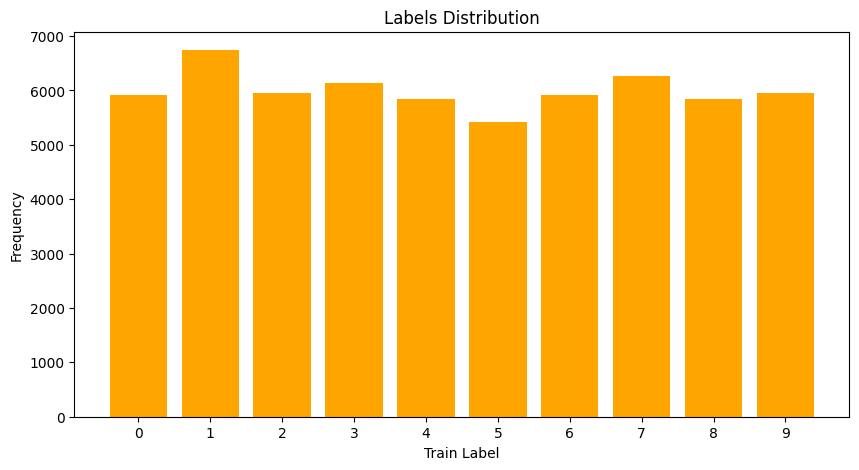

In [54]:

# Count number of occurance each labels
labels_count = np.bincount(train_labels)

# Show in bar chart
plt.figure(figsize =(10,5))
plt.bar (range(len(labels_count)), labels_count, color='orange')
plt.xticks(range(len(labels_count)))
plt.xlabel("Train Label")
plt.ylabel("Frequency")
plt.title("Labels Distribution")
plt.show()

In [55]:
# Compute pixel statistics for each channel
pixel_mean = np.mean(train_images, axis=(0, 1, 2))
pixel_std = np.std(train_images, axis=(0, 1, 2))
pixel_min = np.min(train_images, axis=(0, 1, 2))
pixel_max = np.max(train_images, axis=(0, 1, 2))

# Print the pixel statistics
print("Pixel Mean:", pixel_mean)
print("Pixel Standard Deviation:", pixel_std)
print("Pixel Minimum Value:", pixel_min)
print("Pixel Maximum Value:", pixel_max)

'''
color has pixel range 0-255, which 000 represent as black and 255 represent white in a grayscale color. 
then, if we have number of pixel in between 0-255, then it will be in a gray area. 
means the higher number will be light/near white and if the number is getting closser to 0 then it will be near to pure black

here I provide video link for better visualization 
https://realpython.com/lessons/how-computers-see-images/ 

then, when our pixel mean is around 33 it means our dataset has so many black or near pure black than the white color
'''

Pixel Mean: 33.318421449829934
Pixel Standard Deviation: 78.56748998339798
Pixel Minimum Value: 0
Pixel Maximum Value: 255


'\ncolor has pixel range 0-255, which 000 represent as black and 255 represent white in a grayscale color. \nthen, if we have number of pixel in between 0-255, then it will be in a gray area. \nmeans the higher number will be light/near white and if the number is getting closser to 0 then it will be near to pure black\n\nhere I provide video link for better visualization \nhttps://realpython.com/lessons/how-computers-see-images/ \n\nthen, when our pixel mean is around 33 it means our dataset has so many black or near pure black than the white color\n'

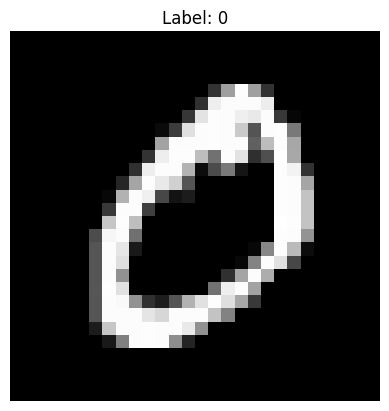

In [56]:
import matplotlib.pyplot as plt

# Specify the index of the image you want to display
image_index = 1

# Get the image and label at the specified index
image = train_images[image_index]
label = train_labels[image_index]

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


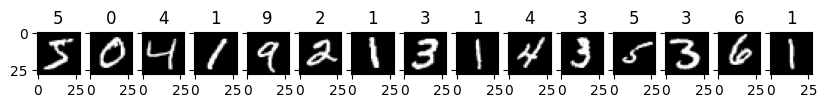

In [57]:
# Create a figure and grid of subplots
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 15), axes_pad=0.1)

# Iterate over the images and labels, and plot them in the grid
for i in range(15):  # Display 15 images (3 rows * 5 columns = 15 images)
    ax = grid[i]
    ax.imshow(train_images[i], cmap='gray')  # Display the image
    ax.set_title(str(train_labels[i]))  # Set the title as the label

# Show the plot
plt.show()

In [58]:
#Next --> data split and model implementation

In [59]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Print the shapes of the train and test sets
print("Shape of train_images:", train_images.shape)
print("Shape of train_labels:", train_labels.shape)
print("Shape of test_images:", test_images.shape)
print("Shape of test_labels:", test_labels.shape)


Shape of train_images: (48000, 28, 28)
Shape of train_labels: (48000,)
Shape of test_images: (12000, 28, 28)
Shape of test_labels: (12000,)


In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape the input images
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Convert the labels to one-hot encoded format
num_classes = 10
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=train_images.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=2, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/2
1350/1350 [==============================] - 19s 13ms/step - loss: 0.0560 - accuracy: 0.9378 - val_loss: 0.0159 - val_accuracy: 0.9794
Epoch 2/2
375/375 [==============================] - 1s 4ms/step - loss: 0.0123 - accuracy: 0.9838
Test Loss: 0.012324183247983456
Test Accuracy: 0.9838333129882812


next --> hyperparameter tuning